In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
# 한글 설정
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


# 데이터 읽기(수원,용인)

In [3]:
lst_name = ['수원','용인','부천','시흥','광명','안산','안양','포천','하남','화성']


lst_suwon = ['전처리_데이터/preSuwonCar.csv','전처리_데이터/preSuwonCard.csv','전처리_데이터/데이터구역_카드소비데이터_수원.csv','전처리_데이터/preSuwonElder.csv']
lst_yong = ['전처리_데이터/preYongCar.csv','전처리_데이터/preYongCard.csv','전처리_데이터/데이터구역_카드소비데이터_용인.csv','전처리_데이터/preYongElder.csv']
lst_bu = ['전처리_데이터/preBuCar.csv','전처리_데이터/preBuCard.csv','전처리_데이터/데이터구역_카드소비데이터_부천.csv','전처리_데이터/preBuElder.csv']
lst_si = ['전처리_데이터/preSiCar.csv','전처리_데이터/preSiCard.csv','전처리_데이터/데이터구역_카드소비데이터_시흥.csv','전처리_데이터/preSiElder.csv']
lst_gwang = ['전처리_데이터/preGwangCar.csv','전처리_데이터/preGwangCard.csv','전처리_데이터/데이터구역_카드소비데이터_광명.csv','전처리_데이터/preGwangElder.csv']
lst_ansan = ['전처리_데이터/preAnsanCar.csv','전처리_데이터/preAnsanCard.csv','전처리_데이터/데이터구역_카드소비데이터_안산.csv','전처리_데이터/preAnsanElder.csv']
lst_anyang = ['전처리_데이터/preAnyangCar.csv','전처리_데이터/preAnyangCard.csv','전처리_데이터/데이터구역_카드소비데이터_안양.csv','전처리_데이터/preAnyangElder.csv']
lst_po = ['전처리_데이터/prePoCar.csv','전처리_데이터/prePoCard.csv','전처리_데이터/데이터구역_카드소비데이터_포천.csv','전처리_데이터/prePoElder.csv']
lst_hanam = ['전처리_데이터/preHanamCar.csv','전처리_데이터/preHanamCard.csv','전처리_데이터/데이터구역_카드소비데이터_하남.csv','전처리_데이터/preHanamElder.csv']
lst_hwasung = ['전처리_데이터/preHwasungCar.csv','전처리_데이터/preHwasungCard.csv','전처리_데이터/데이터구역_카드소비데이터_화성.csv','전처리_데이터/preHwasungElder.csv']

lst_path = [lst_suwon, lst_yong, lst_bu, lst_si, lst_gwang, lst_ansan, lst_anyang, lst_po, lst_hanam, lst_hwasung]

In [4]:
def read_file (lst_path):
    # 수원시
    df_car = pd.read_csv(lst_path[0])
    df_car = df_car.rename(columns={'Unnamed: 0':'행정동코드'})

    df_card = pd.read_csv(lst_path[1])
    df_card = df_card.rename(columns={'admi_cty_no':'행정동코드'})

    df_ansim = pd.read_csv(lst_path[2])
    df_ansim = df_ansim.rename(columns={'읍면동코드':'행정동코드'})
    df_ansim['행정동코드'] = df_ansim['행정동코드'].apply(lambda x : int(x/100))

    # 경기드림데이터 + K 데이터
    df_card = pd.concat([df_card,df_ansim],axis=0)
    df_card = df_card.groupby(['행정동코드']).agg({'소매/유통':'sum','의료/건강':'sum'})

    df_elder = pd.read_csv(lst_path[3])

    df_scale = pd.merge(df_car,df_card,how='left',on='행정동코드')
    df_scale = pd.merge(df_scale,df_elder,how='left',on='행정동코드')
    df_scale = df_scale.set_index('행정동코드', drop=True)

    return df_scale

In [5]:
df_suwon = read_file(lst_suwon)
df_yong = read_file(lst_yong) 
df_bu = read_file(lst_bu) 
df_si = read_file(lst_si) 
df_gwang = read_file(lst_gwang) 
df_ansan = read_file(lst_ansan) 
df_anyang = read_file(lst_anyang) 
df_po = read_file(lst_po) 
df_hanam = read_file(lst_hanam) 
df_hwasung = read_file(lst_hwasung) 

lst_df = [df_suwon, df_yong, df_bu, df_si, df_gwang, df_ansan, df_anyang, df_po, df_hanam, df_hwasung]

In [6]:
# 용인시
yongCar = pd.read_csv('전처리_데이터/preYongCar.csv')
yongCar = yongCar.rename(columns={'Unnamed: 0':'행정동코드'})

yongCard = pd.read_csv('전처리_데이터/preYongCard.csv')
yongCard = yongCard.rename(columns={'admi_cty_no':'행정동코드'})

df_ansim_ = pd.read_csv('전처리_데이터/데이터구역_카드소비데이터_용인.csv')
df_ansim_ = df_ansim_.rename(columns={'읍면동코드':'행정동코드'})
df_ansim_ ['행정동코드']= df_ansim_['행정동코드'].apply(lambda x : int(x/100))

# 경기드림데이터 + K 데이터
yongCard = pd.concat([yongCard,df_ansim_],axis=0)
yongCard = yongCard.groupby(['행정동코드']).agg({'소매/유통':'sum','의료/건강':'sum'})

yongElder = pd.read_csv('전처리_데이터/preYongElder.csv')

dfYong = pd.merge(yongCar,yongCard,how='left',on='행정동코드')
dfYong = pd.merge(dfYong,yongElder,how='left',on='행정동코드')
dfYong = dfYong.set_index('행정동코드', drop=True)

dfYong

,입출차비율,소매/유통,의료/건강,70세_이상_비율
행정동코드,,,,
41461250,0.330190,22979.0,4702.0,0.105204
41461253,0.357527,14202.0,2275.0,0.124157
41461256,0.463438,15698.0,1773.0,0.138135
41461259,0.417935,17801.0,2754.0,0.112361
41461340,0.599342,5190.0,840.0,0.208661
41461350,0.644612,7178.0,1322.0,0.229508
41461360,0.424174,9800.0,1267.0,0.112949
41461510,0.266018,34249.0,21993.0,0.106558
41461525,0.283372,12863.0,4871.0,0.066880


# 5. 각 정보에 대한 스케일링

In [7]:
def standard(df):
    ss = StandardScaler()
    df_scaled = ss.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled,index=df.index,columns=df.columns)
    return df_scaled

In [8]:
suwon_scaled = standard(df_suwon)
yong_scaled = standard(df_yong) 
bu_scaled = standard(df_bu) 
si_scaled = standard(df_si) 
gwang_scaled = standard(df_gwang) 
ansan_scaled = standard(df_ansan) 
anyang_scaled = standard(df_anyang) 
po_scaled = standard(df_po) 
hanam_scaled = standard(df_hanam) 
hwasung_scaled = standard(df_hwasung) 

lst_scaled = [suwon_scaled, yong_scaled, bu_scaled, si_scaled, gwang_scaled, ansan_scaled, anyang_scaled, po_scaled, hanam_scaled,hwasung_scaled]

In [9]:
ss = StandardScaler()
yongScaled = ss.fit_transform(dfYong)
yongScaled = pd.DataFrame(yongScaled,index=dfYong.index,columns=dfYong.columns)
yongScaled

,입출차비율,소매/유통,의료/건강,70세_이상_비율
행정동코드,,,,
41461250,0.317638,0.205565,-0.398198,-0.179379
41461253,0.599363,-0.534863,-0.739889,0.386890
41461256,1.690804,-0.408660,-0.810564,0.804556
41461259,1.221880,-0.231251,-0.672452,0.034440
41461340,3.091337,-1.295115,-0.941918,2.911772
41461350,3.557863,-1.127407,-0.874059,3.534662
41461360,1.286180,-0.906215,-0.881802,0.052012
41461510,-0.343672,1.156303,2.036154,-0.138922
41461525,-0.164835,-0.647821,-0.374405,-1.324446


# 6. Origination 선정

## 6-1. 계층적 군집화, 덴드로그램 확인 >> 전반적으로 3개가 나오는 모습

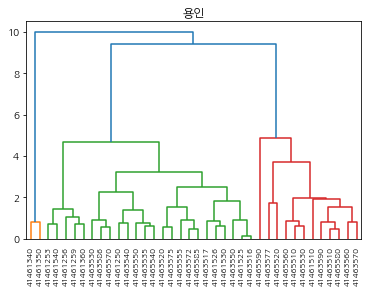

In [10]:
linkage_data = linkage(yongScaled, method='ward', metric='euclidean')
dendrogram(linkage_data,labels=yongScaled.index)
plt.title('용인')
plt.xticks(rotation=90)
plt.show()

In [11]:
def plt_dendrogam(df_scaled,name):
    linkage_data = linkage(df_scaled, method='ward', metric='euclidean')
    dendrogram(linkage_data,labels=df_scaled.index)
    plt.title(name)
    plt.xticks(rotation=90)
    plt.show()

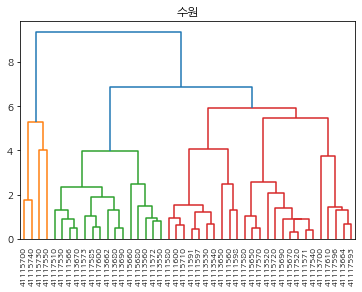

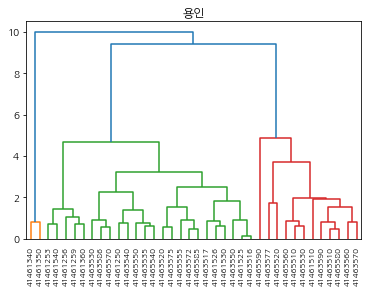

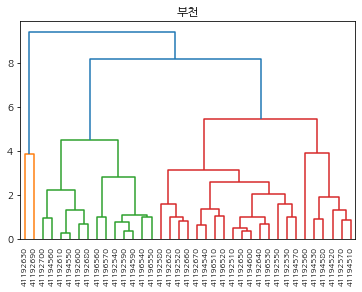

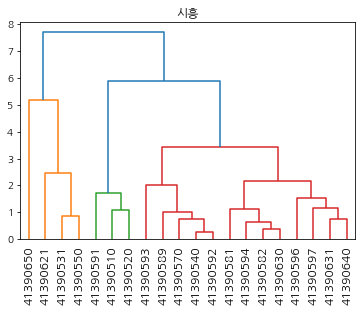

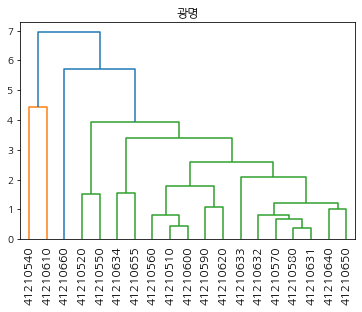

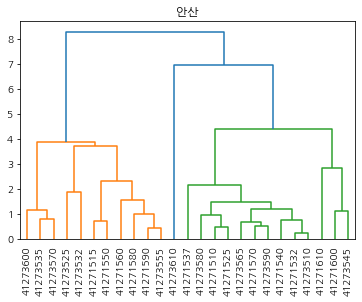

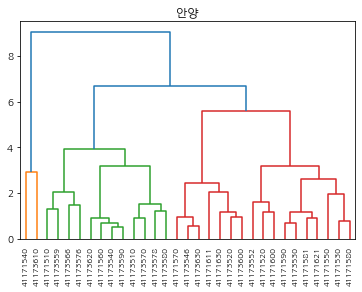

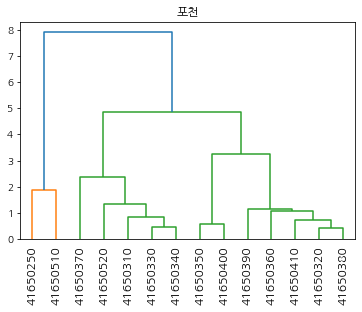

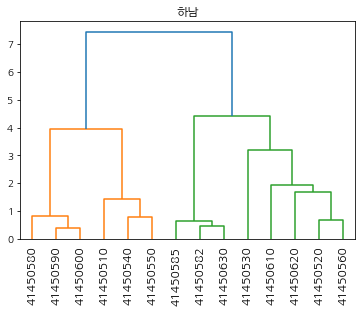

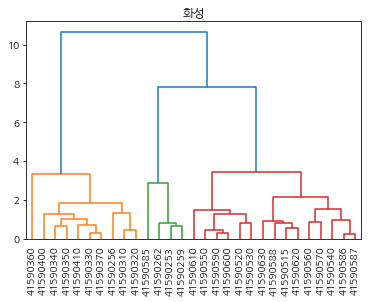

In [12]:
for df_scaled,name in zip(lst_scaled,lst_name):
    plt_dendrogam(df_scaled,name)

## 6-1. K-엘보우

In [13]:
def k_elbow(df_scaled,name):
    inertia = []
    K = range(1, 11)  # 1부터 10까지의 클러스터 수를 시도
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)

    # 엘보우 그래프 시각화
    plt.figure(figsize=(8, 5))
    plt.plot(K, inertia, 'bo-')
    plt.title(f'Elbow Method For {name} Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

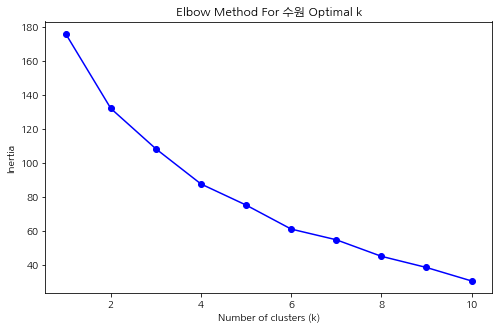

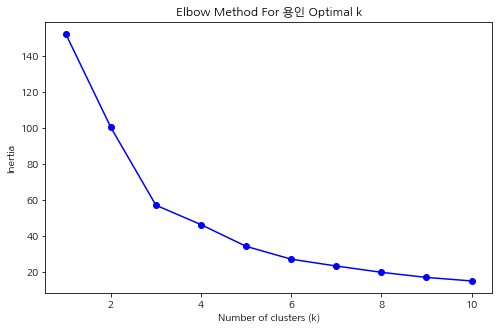

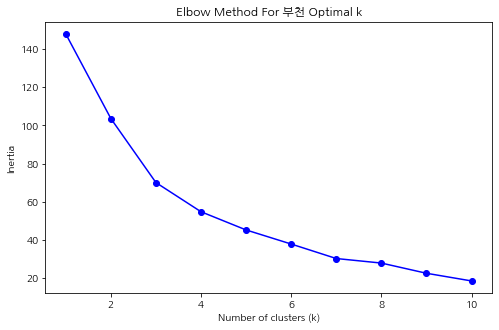

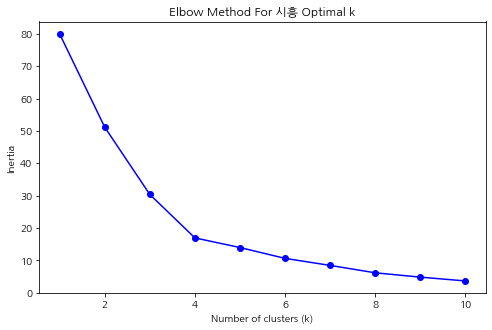

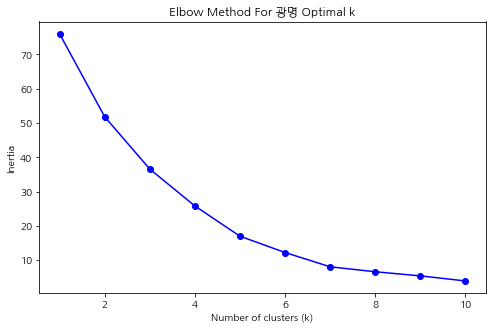

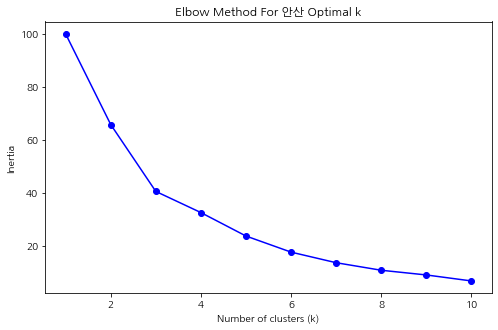

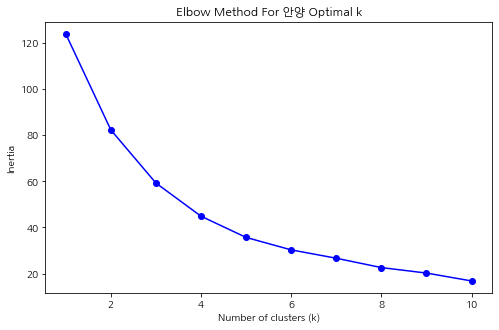

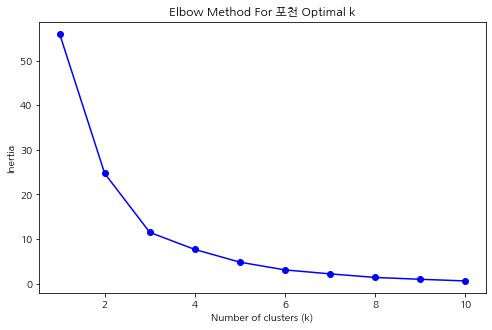

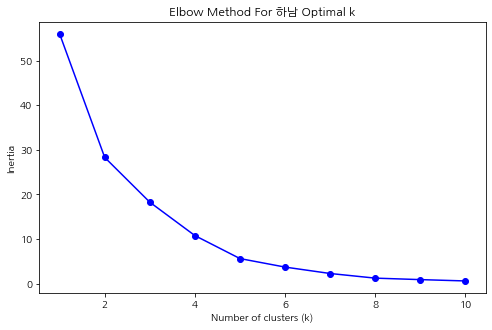

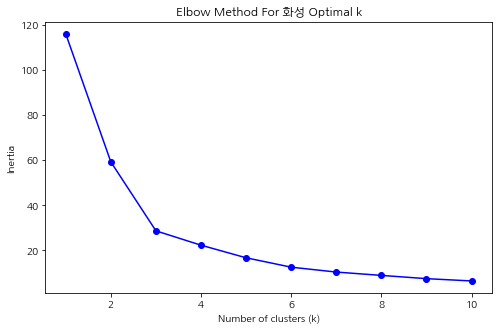

In [14]:
for df_scaled,name in zip(lst_scaled,lst_name):
    k_elbow(df_scaled,name)

## 6-3. K-Means
- DBSCAN으로는 클러스터가 명확하게 구분되지 않아 K-means로만 남김.

In [15]:
# 4. K-Means 군집화 (엘보우 방법에서 최적의 k 결정 후 수행, 예시로 k=3 사용)
optimal_k = 3  # 엘보우 방법으로 도출된 최적의 k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(yongScaled)
dfYong['kmeans_cluster'] = kmeans.labels_

# 7.결과 확인

- 2: 차량비율이 크고, 70세_이상_비율이 높은 공간 >> 차량이 있어야 이동하기 편리하고, 노인인구가 많다. >> 이동권이 적다.>> 출발지로 선택
- 1: 차량비율이 작고, 소매/유통, 의료/건강이 많은 행정동 >> 차량이 없어도 이동하기 비교적 편리하고 이용할 시설이 많다.>> 노선으로 선택
- 0: 1번과 2번을 제외한 행정동 >> 차량비율, 소매/유통, 의료/건강이 중간인 공간

In [16]:
def clustering_scale (df_scale,df_scaled,name):
    optimal_k = 3  # 엘보우 방법으로 도출된 최적의 k
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(df_scaled)
    
    # df_scale에 결과 결합
    df_scale['kmeans_cluster'] = kmeans.labels_
    df_scale = df_scale.sort_values(by=['kmeans_cluster','입출차비율'],ascending=False)
    df_scale['입출차비율'] = df_scale['입출차비율'].apply(lambda x : round(x,2))
    df_scale['70세_이상_비율'] = df_scale['70세_이상_비율'].apply(lambda x : round(x,2))
    sum_mart = np.sum(df_scale['소매/유통'])
    sum_hospital = np.sum(df_scale['소매/유통'])
#     df_scale['소매/유통'] = df_scale['소매/유통'].apply(lambda x : round((x/sum_mart),3))
#     df_scale['의료/건강'] = df_scale['의료/건강'].apply(lambda x : round((x/sum_hospital),3))
    df_scale = df_scale.reset_index()
    print(df_scale)
    df_scale.to_csv(f"클러스터링_데이터/클러스터링_{name}.csv")

In [17]:
for df_scale,df_scaled,name in zip(lst_df,lst_scaled,lst_name):
    clustering_scale(df_scale,df_scaled,name)

       행정동코드  입출차비율     소매/유통     의료/건강  70세_이상_비율  kmeans_cluster
0   41115700   0.26   56591.0   58389.0       0.19               2
1   41115740   0.24  102121.0   64102.0       0.19               2
2   41117550   0.24   56630.0  111038.0       0.06               2
3   41115730   0.22  148486.0   64920.0       0.07               2
4   41111597   0.26   36529.0   13262.0       0.13               1
5   41111600   0.26   41150.0   10785.0       0.16               1
6   41111591   0.26   31194.0   13927.0       0.11               1
7   41115710   0.26   36176.0    5926.0       0.14               1
8   41115720   0.26   22246.0   27236.0       0.08               1
9   41111580   0.26   41326.0   23761.0       0.16               1
10  41111571   0.25   21739.0   13176.0       0.09               1
11  41117540   0.25   21955.0    5706.0       0.09               1
12  41113550   0.25   86330.0   17247.0       0.10               1
13  41113680   0.25   76416.0   22671.0       0.06            

In [18]:
# yong_scale = yong_scale.sort_values(by=['kmeans_cluster','입차비율','출차비율'],ascending=False)
# yong_scale

dfYong = dfYong.sort_values(by=['kmeans_cluster','입출차비율'],ascending=False)
dfYong['입출차비율'] = dfYong['입출차비율'].apply(lambda x : round(x,2))
dfYong['70세_이상_비율'] = dfYong['70세_이상_비율'].apply(lambda x : round(x,2))
sum_mart = np.sum(dfYong['소매/유통'])
sum_hospital = np.sum(dfYong['소매/유통'])
dfYong['소매/유통'] = dfYong['소매/유통'].apply(lambda x : round((x/sum_mart),3))
dfYong['의료/건강'] = dfYong['의료/건강'].apply(lambda x : round((x/sum_hospital),3))
dfYong = dfYong.reset_index()

dfYong

,행정동코드,입출차비율,소매/유통,의료/건강,70세_이상_비율,kmeans_cluster
0,41463577,0.28,0.014,0.029,0.12,2
1,41461510,0.27,0.044,0.028,0.11,2
2,41463560,0.26,0.034,0.016,0.14,2
3,41463510,0.24,0.035,0.017,0.11,2
4,41463570,0.24,0.046,0.014,0.15,2
5,41465530,0.24,0.046,0.013,0.11,2
6,41465560,0.24,0.045,0.012,0.09,2
7,41463520,0.23,0.031,0.014,0.08,2
8,41463590,0.23,0.041,0.020,0.13,2
9,41465590,0.23,0.085,0.036,0.13,2
